# TEA Campus Performance Data Analysis

## Step 1: Data Exploration

### [Data Source](https://rptsvr1.tea.texas.gov/perfreport/account/2019/download.html)

Here we will download Campus Level data Accountability Summary.  A [reference](https://rptsvr1.tea.texas.gov/perfreport/account/2019/download/camprate.html) to explain available columns.  We want columns that will either identify a school, measure school performance, or serve as features that might predict school performance.

In [119]:
import pandas as pd

df = pd.read_csv('./data/CAMPRATE_2019.csv', 
                 usecols=['CAMPUS','CAMPNAME','DISTRICT', 
                                                 'DISTNAME', 'CDALLS', 
                                                 'C_RATING', 'CD1S', 'CD1G', 
                                                 'CD2A', 'CD2AG', 'CD2AS', 
                                                 'CD3', 'CD3G', 'CD3S', 
                                                 'GRDTYPE', 'CFLCHART', 'CFLNEWCAMP', 
                                                 'CPEMALLP', 'CPETALLC', 'CPETECHP', 
                                                 'CPETECOP', 'CPETLEPP', 'CPETSPEP', 'CPETSTEP'])
df.rename(columns={'CDALLS':'OVERALL_SCALED_SCORE', 
                   'C_RATING':'OVERALL_RATING', 
                   'CD1S':'STUDENT_ACHIEVEMENT_SCALED', 
                   'CD1G':'STUDENT_ACHIEVEMENT_RATING', 
                   'CD2A':'SCHOOL_PROGRESS_ACAD_GROWTH_RAW', 
                   'CD2AG':'SCHOOL_PROGRESS_ACAD_GROWTH_RATING', 
                   'CD2AS':'SCHOOL_PROGRESS_ACAD_GROWTH_SCALED', 
                   'CD3':'CLOSING_GAPS_RAW', 
                   'CD3G':'CLOSING_GAPS_RATING', 
                   'CD3S':'CLOSING_GAPS_SCALED', 
                   'GRDTYPE':'SCHOOL_TYPE',
                   'CFLCHART':'FLAG_CHARTER', 
                   'CFLNEWCAMP':'FLAG_NEW', 
                   'CPEMALLP':'STUDENT_MOBILITY_PCT',
                   'CPETALLC':'STUDENT_COUNT',
                   'CPETECHP':'ECHS_PCT', 
                   'CPETECOP':'ECON_DISADV_PCT', 
                   'CPETLEPP':'LEP_PCT', 
                   'CPETSPEP':'SPED_PCT', 
                   'CPETSTEP':'TSTEM_PCT'}, inplace=True)
df.head()

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,STUDENT_COUNT,ECHS_PCT,ECON_DISADV_PCT,LEP_PCT,SPED_PCT,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE
0,1902001,CAYUGA H S,A,93,80,A,90,100,A,100,...,179,0.0,39.1,0.0,20.1,0.0,A,CAYUGA ISD,1902,S
1,1902041,CAYUGA MIDDLE,B,85,67,C,72,66,C,79,...,119,0.0,35.3,0.8,10.9,0.0,B,CAYUGA ISD,1902,M
2,1902103,CAYUGA EL,A,90,76,B,82,97,A,94,...,266,0.0,48.1,0.0,13.2,0.0,A,CAYUGA ISD,1902,E
3,1903001,ELKHART H S,A,91,75,B,85,78,B,83,...,376,0.0,49.7,0.0,11.4,0.0,B,ELKHART ISD,1903,S
4,1903002,ELKHART DAEP,Not Rated,.,.,Not Rated,.,.,Not Rated,.,...,2,0.0,100.0,0.0,0.0,0.0,Not Rated,ELKHART ISD,1903,S


#### Empty cells are filled with a . which is a string character.  We can't convert values to floats without replacing the . symbols with NaNs.

In [120]:
import numpy as np
df.replace({'.':np.nan, 'Y':1, 'N':0}, inplace=True)
df.head()

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,STUDENT_COUNT,ECHS_PCT,ECON_DISADV_PCT,LEP_PCT,SPED_PCT,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE
0,1902001,CAYUGA H S,A,93,80,A,90,100,A,100,...,179,0.0,39.1,0.0,20.1,0.0,A,CAYUGA ISD,1902,S
1,1902041,CAYUGA MIDDLE,B,85,67,C,72,66,C,79,...,119,0.0,35.3,0.8,10.9,0.0,B,CAYUGA ISD,1902,M
2,1902103,CAYUGA EL,A,90,76,B,82,97,A,94,...,266,0.0,48.1,0.0,13.2,0.0,A,CAYUGA ISD,1902,E
3,1903001,ELKHART H S,A,91,75,B,85,78,B,83,...,376,0.0,49.7,0.0,11.4,0.0,B,ELKHART ISD,1903,S
4,1903002,ELKHART DAEP,Not Rated,NaN,NaN,Not Rated,NaN,NaN,Not Rated,NaN,...,2,0.0,100.0,0.0,0.0,0.0,Not Rated,ELKHART ISD,1903,S


#### Now we need to convert the numeric columns from strings to integers or floats.

In [121]:
df = df.astype({'OVERALL_SCALED_SCORE': float,
           'STUDENT_ACHIEVEMENT_SCALED': float, 
           'SCHOOL_PROGRESS_ACAD_GROWTH_RAW': float, 
           'SCHOOL_PROGRESS_ACAD_GROWTH_SCALED': float,
           'CLOSING_GAPS_RAW': float,
           'CLOSING_GAPS_SCALED': float,
           'STUDENT_MOBILITY_PCT': float,
           'STUDENT_COUNT': 'int64',
           'ECHS_PCT': float,
           'ECON_DISADV_PCT': float,
           'LEP_PCT': float,
           'SPED_PCT': float,
           'TSTEM_PCT': float})

### Total number of schools in the dataset

In [122]:
df.shape[0]

8838

### Look at the distribution of performance data.

Text(0.5, 0, 'Overall Scaled Score')

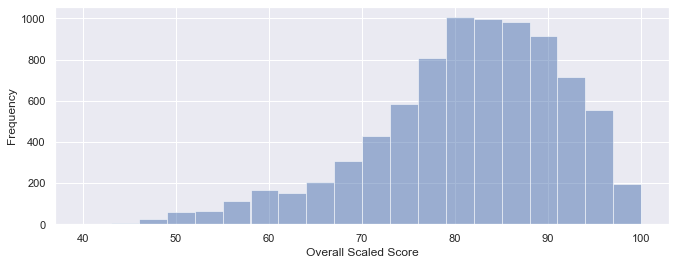

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})

ax1 = df['OVERALL_SCALED_SCORE'].plot.hist(bins=20, alpha=0.5)
ax1.set_xlabel('Overall Scaled Score')

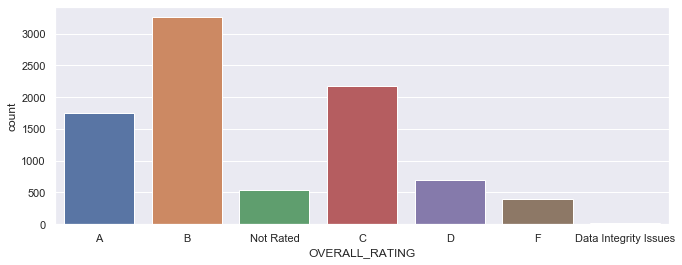

In [124]:
ax2 = sns.countplot(x="OVERALL_RATING", data=df)

#### Let's look at correlations between all of our variables

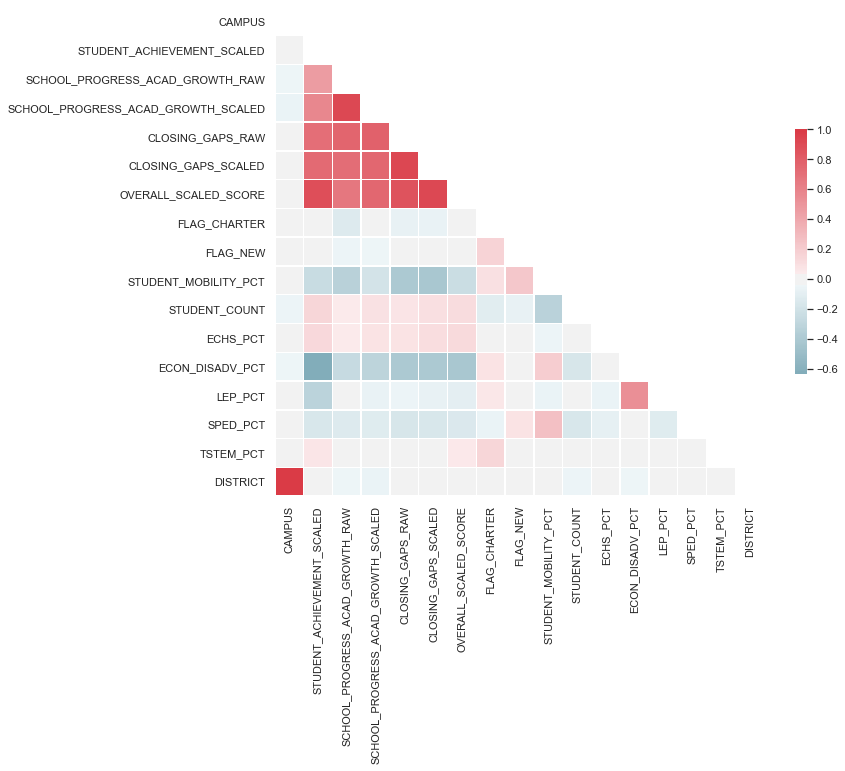

In [125]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Some insights we can get from the above plot - looking for correlations between school demographic or type data and performance data.  More red means a positive correlation and more green means a negative correlation.  

Start with overall scaled score - we see slight positive correlations with TSTEM percentage, early college high school percentage, student count; negative correlations with percentage economically disadvantaged, SPED, LEP, and student mobility; and no correlation with charter status or new school status.  

# Looking for Outliers

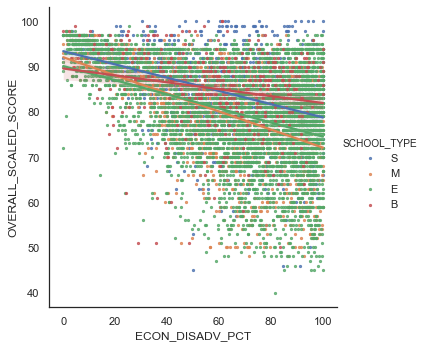

In [126]:
sns.lmplot(x="ECON_DISADV_PCT", y="OVERALL_SCALED_SCORE", data=df, fit_reg=True, 
           hue='SCHOOL_TYPE', scatter_kws={"s": 5})

#### It looks like for schools with a higher percentage of economically disadvantaged students there is a wide range of overall scaled scores.  How much of this is accounted for by school type or other characteristics?  Can we find schools that are doing better than others with the same characteristics?  We can use different types of models that consider all characteristics and find schools that do significantly better than their predicted score.

## Step 2: Prepare Data

In [127]:
#Drop schools that do not have an overall scaled score
df.dropna(subset=['OVERALL_SCALED_SCORE', 'STUDENT_ACHIEVEMENT_SCALED'], inplace=True)

In [128]:
#Encode school type data using one hot encoding
df['SCHOOL_TYPE_E'] = pd.get_dummies(df['SCHOOL_TYPE'])['E']
df['SCHOOL_TYPE_M'] = pd.get_dummies(df['SCHOOL_TYPE'])['M']
df['SCHOOL_TYPE_S'] = pd.get_dummies(df['SCHOOL_TYPE'])['S']

In [129]:
#Randomize the data
df = df.reindex(np.random.permutation(df.index))

In [130]:
#Set features and target
features = ['SCHOOL_TYPE_E', 'SCHOOL_TYPE_M','SCHOOL_TYPE_S', 'FLAG_CHARTER', 'FLAG_NEW', 
            'STUDENT_COUNT', 'ECHS_PCT', 'ECON_DISADV_PCT', 'LEP_PCT', 'SPED_PCT', 'TSTEM_PCT']
target = ['OVERALL_SCALED_SCORE']

In [131]:
#Make arrays for training and testing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

X_train = df_train[features].values
X_test = df_test[features].values
y_train = np.ravel(df_train[target].values)
y_test = np.ravel(df_test[target].values)

print("{} schools in training set".format(X_train.shape[0]))
print("{} schools in test set".format(X_test.shape[0]))

6352 schools in training set
1588 schools in test set


## Step 3: Fit the Model

In [132]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(verbose=True, min_samples_leaf=5)
RF_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

## Step 4: Look at the Results

In [133]:
#Use the trained model to predict overall scaled score on schools in test set
y_pred = RF_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [134]:
#Get performance metrics
from sklearn.metrics import mean_squared_error

print("Root mean squared error on test set: {}".format(np.sqrt(mean_squared_error(y_pred, y_test))))

Root mean squared error on test set: 8.70413641586831


Text(0.5, 0, 'Residual')

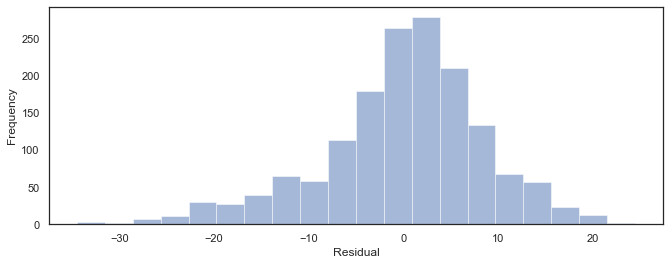

In [135]:
#Look at the distribution of residuals
res = y_test - y_pred
ax3 = pd.DataFrame(res).plot.hist(bins=20, alpha=0.5, legend=False)
ax3.set_xlabel('Residual')

Text(0, 0.5, 'Actual Score')

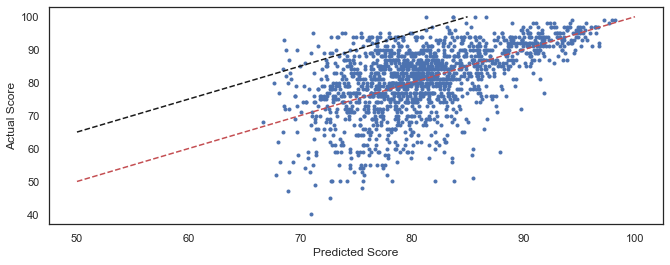

In [136]:
#Plot actual score vs predicted score.  
plt.plot(y_pred, y_test, '.')
plt.plot([50,100],[50,100],'r--')
#plt.plot([50,85],[65,100], 'k--')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')

Red dashed line is the one to one line - points above scored higher than their prediction.
Black dashed line is the plus 15 line - points above exceeded their prediction by 15 points or better.

Text(0, 0.5, 'Residual')

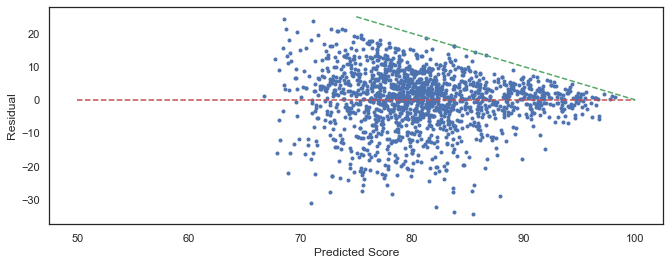

In [137]:
#Plot residuals as a function of predicted score
plt.plot(y_pred, res, '.')
plt.plot([50,100],[0,0],'r--')
plt.plot([75,100],[25,0], 'g--')
plt.xlabel('Predicted Score')
plt.ylabel('Residual')

Red dashed line is residual of zero.  Points above represent schools that exceeded their prediction.  Green dashed line is an actual score of 100.

Text(0, 0.5, 'Residual')

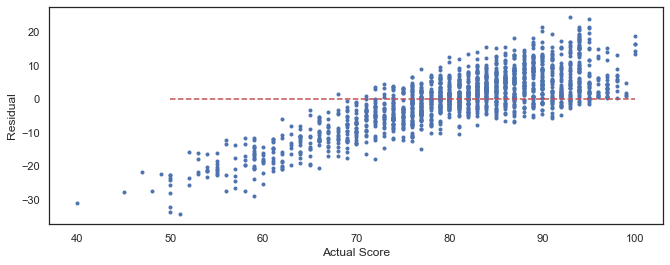

In [138]:
#Plot residuals as a function of actual score
plt.plot(y_test, res, '.')
plt.plot([50,100],[0,0],'r--')
#plt.plot([75,100],[25,0], 'g--')
plt.xlabel('Actual Score')
plt.ylabel('Residual')

In [139]:
#Show how much each feature contributes to the model prediction
feature_importances = pd.DataFrame(RF_model.feature_importances_,
                                   index = df[features].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                 importance
ECON_DISADV_PCT    0.443621
LEP_PCT            0.159163
SPED_PCT           0.149665
STUDENT_COUNT      0.145055
SCHOOL_TYPE_S      0.050144
SCHOOL_TYPE_E      0.015409
SCHOOL_TYPE_M      0.013708
FLAG_CHARTER       0.010627
ECHS_PCT           0.006632
FLAG_NEW           0.003960
TSTEM_PCT          0.002016


## Step 5: Get an 'overperformance' score

In [140]:
#Retrain a model using the data from all schools and a subset of features.
features_sub = ['ECON_DISADV_PCT', 'LEP_PCT', 'SPED_PCT', 
                'STUDENT_COUNT', 'SCHOOL_TYPE_S', 'SCHOOL_TYPE_E', 
                'FLAG_CHARTER', 'SCHOOL_TYPE_M']
X_all = df[features_sub].values
y_all = np.ravel(df[target].values)

RF_model_all = RandomForestRegressor(verbose=True, min_samples_leaf=10)
RF_model_all.fit(X_all, y_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [141]:
#Get a prediction score for each school based on the model.
df['PREDICTED_OVERALL_SCALED_SCORE'] = RF_model_all.predict(X_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [142]:
#Give each school an 'overperformance score'.
df['OVERPERFORMANCE'] = df['OVERALL_SCALED_SCORE']-df['PREDICTED_OVERALL_SCALED_SCORE']

#Sort dataframe by overperformance column and look at the top 20 schools.
df.sort_values(by=['OVERPERFORMANCE'], ascending=False).head(20)

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
5977,152802101,RISE ACADEMY,A,92.0,72.0,C,75.0,100.0,A,100.0,...,0.0,A,RISE ACADEMY,152802,E,1,0,0,74.665703,20.334297
6929,194902101,AVERY EL,B,86.0,83.0,A,91.0,100.0,A,100.0,...,0.0,A,AVERY ISD,194902,E,1,0,0,74.912663,19.087337
1157,31901106,GARDEN PARK EL,B,83.0,79.0,B,86.0,100.0,A,100.0,...,0.0,A,BROWNSVILLE ISD,31901,E,1,0,0,73.990471,19.009529
1206,31903106,DISHMAN EL,A,91.0,72.0,C,75.0,88.0,B,83.0,...,0.0,A,HARLINGEN CISD,31903,E,1,0,0,71.270321,18.729679
4481,101912463,YOUNG WOMEN'S COLLEGE PREP ACADEMY,A,94.0,71.0,B,81.0,100.0,A,100.0,...,0.0,A,HOUSTON ISD,101912,B,0,0,0,77.606883,18.393117
5546,123803103,TEKOA ACADEMY OF ACCELERATED STUDI,B,89.0,88.0,A,93.0,100.0,A,100.0,...,0.0,A,TEKOA ACADEMY OF ACCELERATED STUDI,123803,E,1,0,0,76.627254,18.372746
4320,101912152,FIELD EL,A,92.0,72.0,C,75.0,100.0,A,100.0,...,0.0,A,HOUSTON ISD,101912,E,1,0,0,76.696448,18.303552
3285,76904101,ROTAN EL,B,86.0,70.0,C,72.0,100.0,A,100.0,...,0.0,A,ROTAN ISD,76904,E,1,0,0,74.936368,18.063632
5007,108807024,IDEA EASTSIDE COLLEGE PREPARATORY,B,81.0,73.0,B,81.0,72.0,B,82.0,...,0.0,B,IDEA PUBLIC SCHOOLS,108807,M,0,1,0,70.196320,17.803680
3205,72801128,PREMIER H S OF NORTH AUSTIN,A,95.0,NaN,Not Rated,NaN,NaN,Not Rated,NaN,...,0.0,A,PREMIER HIGH SCHOOLS,72801,S,0,0,1,81.245405,17.754595


In [143]:
#Search for a district.
df[df['DISTNAME'].str.contains("SPRING BRANCH")]

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
4791,101920045,SPRING FOREST MIDDLE,B,84.0,68.0,C,74.0,51.0,C,75.0,...,0.0,B,SPRING BRANCH ISD,101920,M,0,1,0,80.889458,0.110542
4794,101920048,CORNERSTONE ACADEMY,A,94.0,74.0,B,83.0,93.0,A,93.0,...,0.0,A,SPRING BRANCH ISD,101920,M,0,1,0,93.258411,0.741589
4798,101920104,FROSTWOOD EL,A,95.0,88.0,A,93.0,100.0,A,100.0,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,94.801554,2.198446
4813,101920119,SHERWOOD EL,C,70.0,72.0,C,75.0,61.0,C,73.0,...,0.0,C,SPRING BRANCH ISD,101920,E,1,0,0,81.339266,-7.339266
4810,101920116,WESTWOOD EL,D,62.0,59.0,F,57.0,26.0,D,61.0,...,0.0,D,SPRING BRANCH ISD,101920,E,1,0,0,78.010006,-11.010006
4808,101920114,SPRING BRANCH EL,F,50.0,62.0,F,59.0,14.0,F,48.0,...,0.0,F,SPRING BRANCH ISD,101920,E,1,0,0,73.683868,-17.683868
4780,101920003,SPRING WOODS H S,C,74.0,61.0,D,68.0,40.0,C,73.0,...,0.0,C,SPRING BRANCH ISD,101920,S,0,0,1,81.117633,-2.117633
4781,101920005,NORTHBROOK H S,D,67.0,64.0,C,72.0,26.0,D,68.0,...,0.0,C,SPRING BRANCH ISD,101920,S,0,0,1,79.599974,-5.599974
4799,101920105,HOLLIBROOK EL,C,71.0,77.0,B,83.0,78.0,C,78.0,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,82.097521,-0.097521
4817,101920123,THORNWOOD EL,F,59.0,57.0,F,56.0,14.0,F,48.0,...,0.0,F,SPRING BRANCH ISD,101920,E,1,0,0,71.175165,-12.175165


## Simple query 

In [144]:
#Create a function that allows you to enter search criteria and shows the results.
def look_at(district_search):
    cols = ['CAMPNAME', 'OVERALL_RATING', 'PREDICTED_OVERALL_SCALED_SCORE', 'OVERALL_SCALED_SCORE', 'OVERPERFORMANCE']
    return df[df['DISTNAME'].str.contains(district_search)][cols]

In [145]:
look_at('AUSTIN')

,CAMPNAME,OVERALL_RATING,PREDICTED_OVERALL_SCALED_SCORE,OVERALL_SCALED_SCORE,OVERPERFORMANCE
8058,CUNNINGHAM EL,C,75.552112,70.0,-5.552112
8065,JOSLIN EL,C,78.098576,71.0,-7.098576
8081,TRAVIS HTS EL,B,80.812131,84.0,3.187869
8088,OAK HILL EL,C,82.530859,79.0,-3.530859
8108,PALM EL,C,78.760497,73.0,-5.760497
...,...,...,...,...,...
8013,BOWIE H S,A,93.159510,92.0,-1.159510
8018,EASTSIDE MEMORIAL AT THE JOHNSTON,B,75.821581,85.0,9.178419
8014,LBJ HIGH SCHOOL,B,77.274166,82.0,4.725834
8063,HARRIS EL,C,77.333844,71.0,-6.333844


## Aggregate for districts

In [146]:
#Create a column for overprediction weighted by student count.
df['WEIGHTED_OVERPERFORMANCE'] = df['OVERPERFORMANCE']*df['STUDENT_COUNT']

In [147]:
#Group by district
dist_df = df.groupby(['DISTNAME','DISTRICT'])[['WEIGHTED_OVERPERFORMANCE', 'STUDENT_COUNT']].sum().reset_index()
dist_df['DIST_OVERPERFORMANCE'] = dist_df['WEIGHTED_OVERPERFORMANCE']/dist_df['STUDENT_COUNT']

## Plot Districts on a Map

In [148]:
#Bring in regions so we can look at more regional maps.
dist_reg = pd.read_csv('./data/DISTRATE_2019.csv', 
                 usecols=['DISTRICT', 'DISTNAME', 'COUNTY', 'CNTYNAME', 'REGION', 'REGNNAME'])
dist_reg_df = dist_reg.merge(dist_df, on='DISTRICT', how='inner')

In [149]:
import geopandas as gpd

#Import district shapefile and clean
df_boundaries = gpd.read_file('./data/Districts_2018-2019.geojson')
df_boundaries.drop(['FID', 'SDLEA10', 'NAME2', 'DISTRICT', 'DISTRICT_C', 'NCES_DISTR', 
                    'COLOR', 'SHAPE_Length', 'SHAPE_Area'], axis=1, inplace=True)
df_boundaries.rename(columns={'DISTRICT_N':'DISTRICT'}, inplace=True)

#Merge shapefile with data to get a geodataframe.
dist_gdf = (gpd.GeoDataFrame(df_boundaries.merge(dist_reg_df, on="DISTRICT", how="inner"), 
                               crs = 'epsg:4326'))

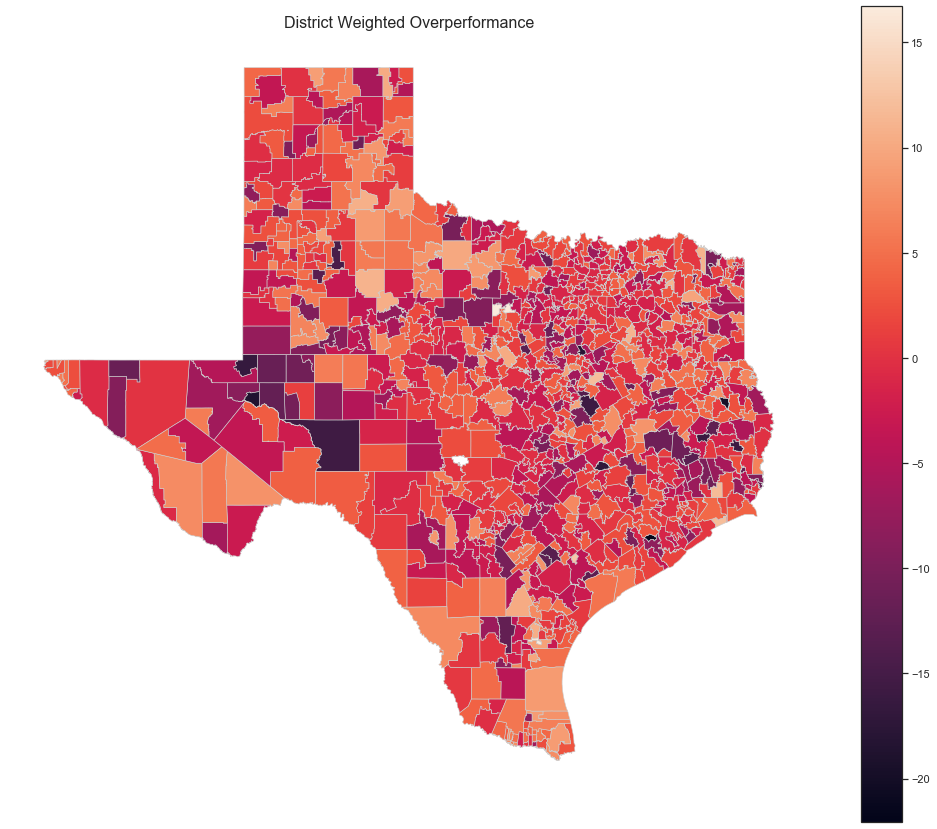

In [237]:
#Plot the entire state.

fig, ax = plt.subplots(1, figsize=(18, 15))

dist_gdf.plot(column='DIST_OVERPERFORMANCE', linewidth = 0.6, ax=ax, edgecolor='0.8', legend=True)
    
    
ax.axis('off')
ax.set_title('District Weighted Overperformance', fontdict={'fontsize': 16, 'fontweight' : 3})

plt.savefig("data/Texas_District_Chloro.png")


In [257]:
#Function to plot a specified region
def plot_region(df, num, save=False):
    #Get labels to plot
    df["coords"] = df["geometry"].apply(lambda x: x.representative_point().coords[:])
    df["coords"] = [coords[0] for coords in df['coords']]
    
    #Plot
    fig, ax = plt.subplots(1, figsize=(18, 15))

    df[df['REGION']==num].plot(column='DIST_OVERPERFORMANCE', linewidth = 0.6, ax=ax, 
                               edgecolor='0.8', norm=plt.Normalize(vmin=-20, vmax=15), legend=True)

    for idx, row in df[df['REGION']==num].iterrows():
        plt.annotate(s=row['NAME'], xy=row['coords'],horizontalalignment='center', color='w', fontsize=10)
    
    ax.axis('off')
    ax.set_title('District Weighted Overperformance - Region {}'.format(num), fontdict={'fontsize': 18, 'fontweight' : 3})
    if save:
        plt.savefig("data/Region_{}_Chloro.png".format(num))

   

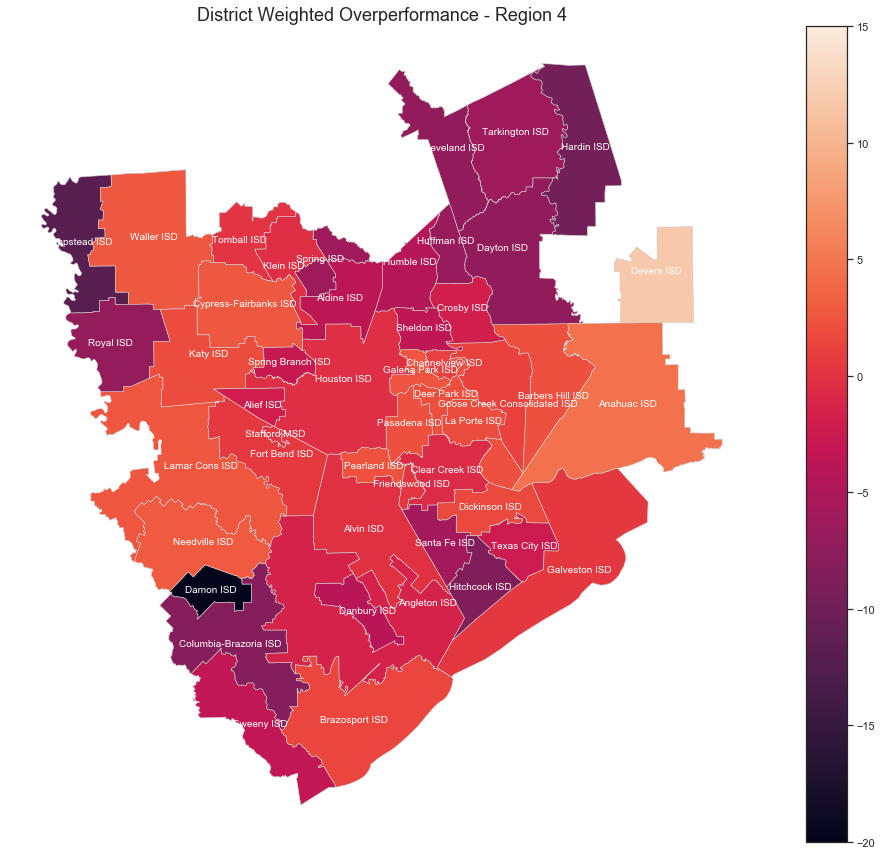

In [258]:
#Plot a region
plot_region(dist_gdf, 4)

In [233]:
dist_df[dist_df['DISTNAME'].str.contains('DALLAS')]

,DISTNAME,DISTRICT,WEIGHTED_OVERPERFORMANCE,STUDENT_COUNT,DIST_OVERPERFORMANCE
8,ACADEMY OF DALLAS,57810,-1381.496455,487,-2.836748
267,DALLAS ISD,57905,20070.155130,151816,0.132201
591,LAKE DALLAS ISD,61912,-3983.841548,4016,-0.991992
